### importing necessry libraries

In [1]:
import pandas as pd
import numpy as np
## import visuallization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

#data preprocessing and EDA libraries
from collections import OrderedDict 
from sklearn.preprocessing import StandardScaler

## warning filter library
import warnings
warnings.filterwarnings('ignore')

##multicolinerit test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA


#model selection libraries
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.model_selection import cross_val_score,GridSearchCV


#ml models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

#model evaluation libraries:
from sklearn.metrics import r2_score,mean_squared_error

#unsupervised ml library
from sklearn.cluster import KMeans


In [2]:
#pip install xgboost

In [2]:
df = pd.read_excel('Capstone Project.xlsx')

In [3]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [7]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [9]:
for col in df.columns:
        print(df[col])

0       141.3
1       168.9
2       250.0
3       266.0
4       154.8
        ...  
1025    135.0
1026    531.3
1027    276.4
1028    342.0
1029    540.0
Name: cement, Length: 1030, dtype: float64
0       212.0
1        42.2
2         0.0
3       114.0
4       183.4
        ...  
1025      0.0
1026      0.0
1027    116.0
1028     38.0
1029      0.0
Name: slag, Length: 1030, dtype: float64
0         0.0
1       124.3
2        95.7
3         0.0
4         0.0
        ...  
1025    166.0
1026      0.0
1027     90.3
1028      0.0
1029      0.0
Name: ash, Length: 1030, dtype: float64
0       203.5
1       158.3
2       187.4
3       228.0
4       193.3
        ...  
1025    180.0
1026    141.8
1027    179.6
1028    228.0
1029    173.0
Name: water, Length: 1030, dtype: float64
0        0.0
1       10.8
2        5.5
3        0.0
4        9.1
        ... 
1025    10.0
1026    28.2
1027     8.9
1028     0.0
1029     0.0
Name: superplastic, Length: 1030, dtype: float64
0        971.8
1       108

In [14]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            stats = OrderedDict({'Feature Name' : col,
                              'count' : my_df[col].count(),
                               'minimum' : my_df[col].min(),
                               'quartile1' : my_df[col].quantile(0.25),
                               'quartile2' : my_df[col].quantile(0.50),
                               'quartile3' : my_df[col].quantile(0.75),
                               
                                'mean' : my_df[col].mean(),
                               'variance' : my_df[col].var(),
                               'standard deviation' : my_df[col].std(),
                               'skewness' : my_df[col].skew(),
                               'kurtosis' : my_df[col].kurt(),
                               })
        result.append(stats)
    result_df = pd.DataFrame(result)
    
    skewness_label = []
    for i in result_df['skewness']:
        if i <= -1:
            skewness_label.append('highly negative skewed')
        elif -1 < i <= -0.5:
            skewness_label.append('moderetly negative skewed')
        elif -0.5 < i < 0:
            skewness_label.append('fairly negative skewed')
        elif 0 < i < 0.5:
            skewness_label.append('fairly positive skewed')
        elif 0.5 <= i < 1:
            skewness_label.append('moderetly positive skewed')
        elif i >= 1 :
            skewness_label.append('highly positive skewed')
            
    result_df['skewness comment'] = skewness_label
    
    
    kurtosis_label = []
    for i in result_df['kurtosis']:
        if i > 1:
            kurtosis_label.append('leptokurtic')
        elif -1 >= i :
            kurtosis_label.append('platykurtic')
        else:
            kurtosis_label.append('mesokurtic')
        
            
    result_df['kurtosis comment'] = kurtosis_label
    
    outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != 'object':
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.50)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3 - Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                outliers_label.append('Have outliers')
            else:
                outliers_label.append('No outliers')b
    result_df['result comment'] = outliers_label
    return result_df
    
        
                
                
    
        
            

In [8]:
custom_summary(df)

Feature Name  count  minimum  quartile1  quartile2  quartile3        mean  \
0        cement   1030   102.00    192.375    272.900    350.000  281.167864   
1          slag   1030     0.00      0.000     22.000    142.950   73.895825   
2           ash   1030     0.00      0.000      0.000    118.300   54.188350   
3         water   1030   121.80    164.900    185.000    192.000  181.567282   
4  superplastic   1030     0.00      0.000      6.400     10.200    6.204660   
5     coarseagg   1030   801.00    932.000    968.000   1029.400  972.918932   
6       fineagg   1030   594.00    730.950    779.500    824.000  773.580485   
7           age   1030     1.00      7.000     28.000     56.000   45.662136   
8      strength   1030     2.33     23.710     34.445     46.135   35.817961   

       variance  standard deviation  skewness   kurtosis  \
0  10921.580220          104.506364  0.509481  -0.520652   
1   7444.124812           86.279342  0.800717  -0.508175   
2   4095.616541           63.997004  0.537354  -1.328746   
3    456.002651           21.354219  0.074628   0.122082   
4     35.686781            5.973841  0.907203   1.411269   
5   6045.677357           77.753954 -0.040220  -0.599016   
6   6428.187792           80.175980 -0.253010  -0.102177   
7   3990.437729           63.169912  3.269177  12.168989   
8    279.081814           16.705742  0.416977  -0.313725   

            skewness comment kurtosis comment result comment  
0  moderetly positive skewed       mesokurtic    No outliers  
1  moderetly positive skewed       mesokurtic  Have outliers  
2  moderetly positive skewed      platykurtic    No outliers  
3     fairly positive skewed       mesokurtic  Have outliers  
4  moderetly positive skewed      leptokurtic  Have outliers  
5     fairly negative skewed       mesokurtic    No outliers  
6     fairly negative skewed       mesokurtic  Have outliers  
7     highly positive skewed      leptokurtic  Have outliers  
8     fairly positive skewed       mesokurtic  Have outliers

### analysis summery from custom summary
1. cement has mesokurtic curve which implies data points are moderate in distance from the mean so mean and sd are moderate.
2. ash has a platy curve so thats mean does not represent whole data properly.
3. superplastic has a lepto which means data points are closer to the mean.
 

### performing outlier fit

In [9]:
def replace_outlier(my_df,col,method = 'Quartile',strategy = 'median'):
    col_data = my_df[col]
    
    if method == 'Quartile':
    #using quartile to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.5)
        q3 = col_data.quantile(0.75)
        IQR = q3 - q1
        LW = q1 - 1.5*IQR
        UW = q3 + 1.5*IQR
    elif method == 'standard deviation':
        mean = col_data.mean()
        std = col_data.std()
        LW = mean - 2*std() 
        UW = mean + 2*std()
    else:
        print('pass a correct method')
        
    # printing all the outliers
    
    outliers = my_df.loc[(col_data < LW) | (col_data > UW)] 
    outlier_density = round(len(outliers)/len(my_df),2)*100
    
    if len(outliers) == 0:
        print(f'feature {col} does not have a outliers')
        print('\n')
    else:
        print(f'feature {col} have a outliers')
        print(f'total no. of outliers {col} are {len(outliers)}')
        print('\n')
        
        print(f'outliers percentage in {col} is {outlier_density}%')
        print('\n')
        display( my_df[(col_data < LW) | (col_data > UW)] )
        
    #replacing outliers
    if strategy  == 'median':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = q2
        
    elif strategy == 'mean':
        my_df.loc[(col_data < LW) | (col_data > UW), col] = mean
        
    else:
        print('pass the correct strategy')
        
    return my_df
    
        
        

### ODT Plots(outlier detection technique)
1. descriptive plots
2. histogrham with outliers
3. histogram without outliers

In [10]:
def odt_plots(my_df,col):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (25,8))  #1 row and 3 columns in output plot
    
    #descriptive statistics box plot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col + 'box plot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('boxplot')
    
    
    #ploting histogram with outliers
    
    sns.distplot(my_df[col],ax = ax2,fit = sci.norm)
    ax2.axvline(my_df[col].mean(),color = 'green')
    ax2.axvline(my_df[col].median(),color = 'brown')
    ax2.set_title(col + 'histogram with outliers')
    ax2.set_ylabel('density')
    ax2.set_xlabel('values')
    
    # replacing outliers
    
    df_out = replace_outlier(my_df,col)
    
    #ploting histogram without outliers
    
    sns.distplot(df_out[col],ax = ax3, fit = sci.norm)
    ax3.axvline(my_df[col].mean(),color = 'green')
    ax3.axvline(my_df[col].median(),color = 'brown')
    ax3.set_title(col + 'histogram without outliers')
    ax3.set_ylabel('density')
    ax3.set_xlabel('values')
    plt.show()

feature cement does not have a outliers




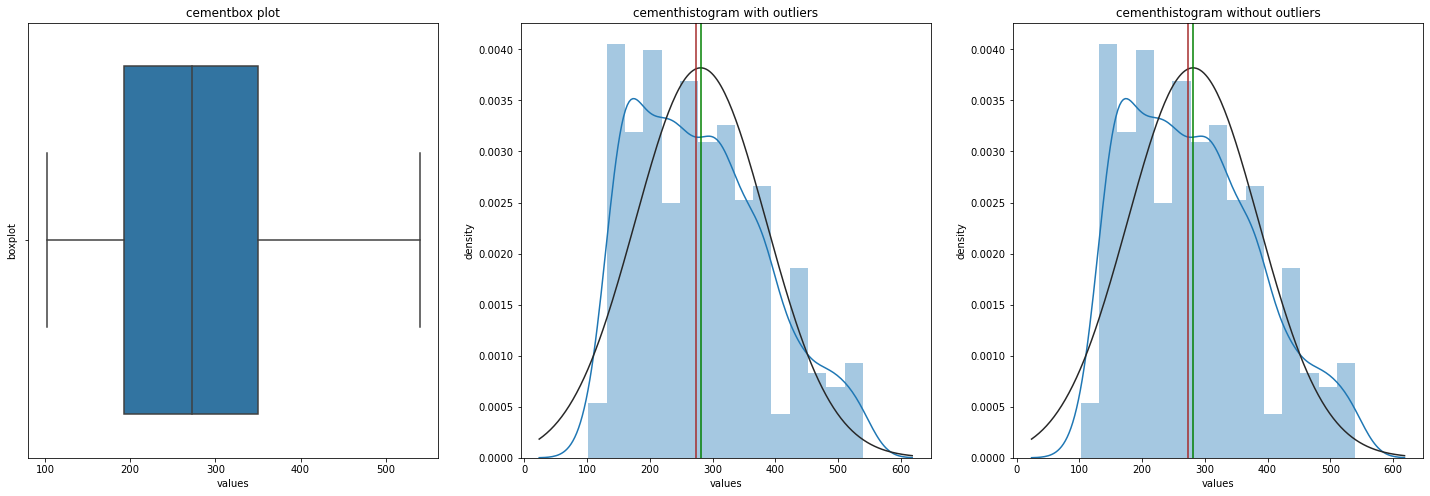

feature slag have a outliers
total no. of outliers slag are 2


outliers percentage in slag is 0.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918   239.6  359.4  0.0  185.7           0.0      941.6    664.3   28   
990   239.6  359.4  0.0  185.7           0.0      941.6    664.3    7   

     strength  
918     39.44  
990     25.42

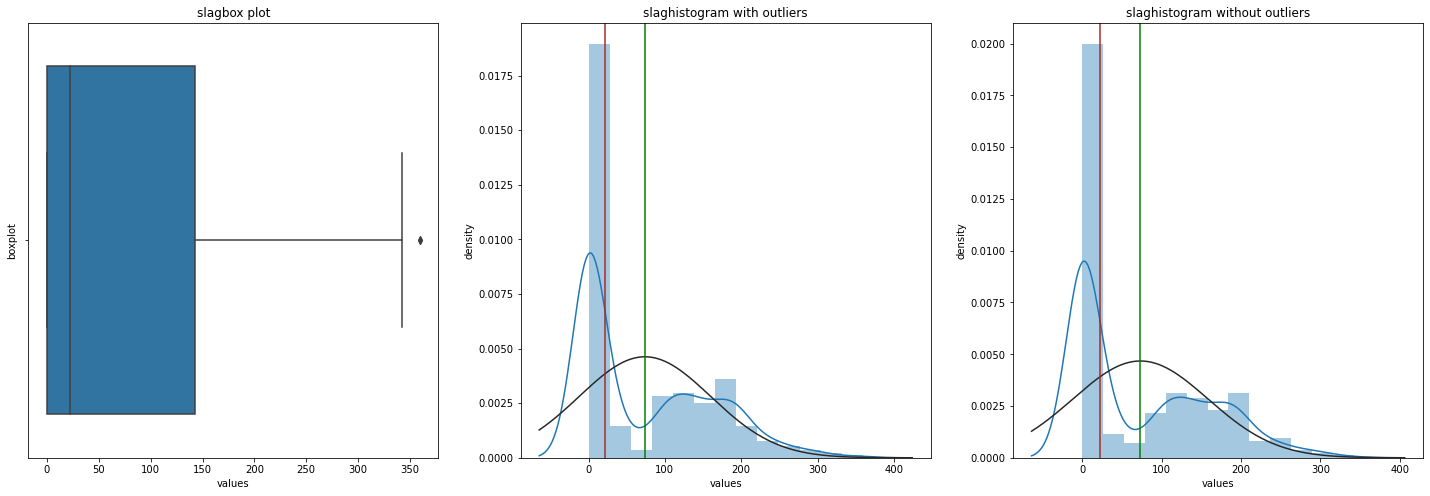

feature ash does not have a outliers




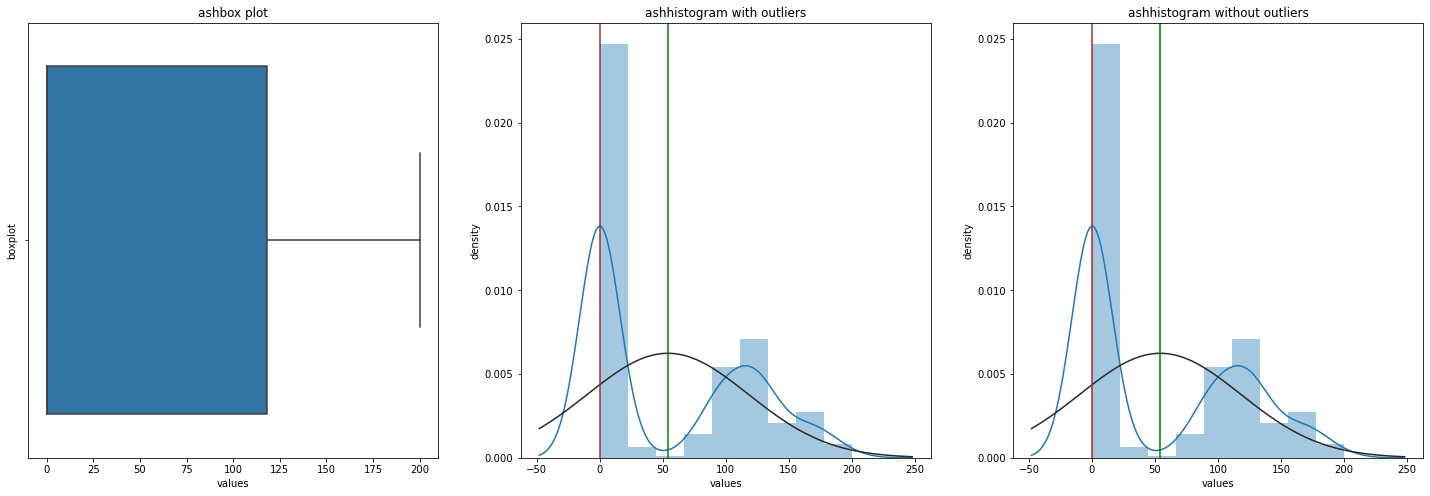

feature water have a outliers
total no. of outliers water are 9


outliers percentage in water is 1.0%




cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66    237.0   92.0   71.0  247.0           6.0      853.0    695.0   28   
263   236.9   91.7   71.5  246.9           6.0      852.9    695.4   28   
432   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   28   
462   168.0   42.1  163.8  121.8           5.7     1058.7    780.1  100   
587   168.0   42.1  163.8  121.8           5.7     1058.7    780.1    3   
740   140.0  164.0  128.0  237.0           6.0      869.0    656.0   28   
789   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   56   
826   139.7  163.9  127.7  236.7           5.8      868.6    655.6   28   
914   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   14   

     strength  
66      28.63  
263     28.63  
432     24.24  
462     39.23  
587      7.75  
740     35.23  
789     32.85  
826     35.23  
914     17.82

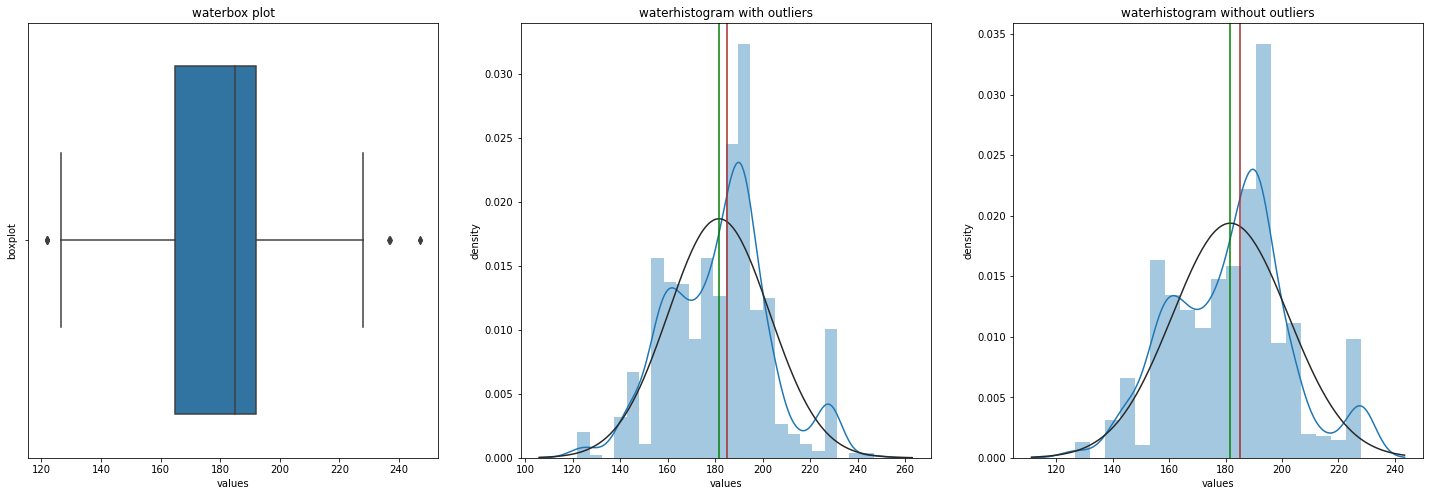

feature superplastic have a outliers
total no. of outliers superplastic are 10


outliers percentage in superplastic is 1.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0  0.0  141.8          28.2      852.1    893.7   91   
156    531.3    0.0  0.0  141.8          28.2      852.1    893.7   28   
232    469.0  117.2  0.0  137.8          32.2      852.1    840.5   56   
292    469.0  117.2  0.0  137.8          32.2      852.1    840.5   91   
538    531.3    0.0  0.0  141.8          28.2      852.1    893.7    7   
744    469.0  117.2  0.0  137.8          32.2      852.1    840.5    7   
816    469.0  117.2  0.0  137.8          32.2      852.1    840.5   28   
838    531.3    0.0  0.0  141.8          28.2      852.1    893.7   56   
955    469.0  117.2  0.0  137.8          32.2      852.1    840.5    3   
1026   531.3    0.0  0.0  141.8          28.2      852.1    893.7    3   

      strength  
44        59.2  
156       56.4  
232       69.3  
292       70.7  
538       46.9  
744       54.9  
816       66.9  
838       58.8  
955       40.2  
1026      41.3

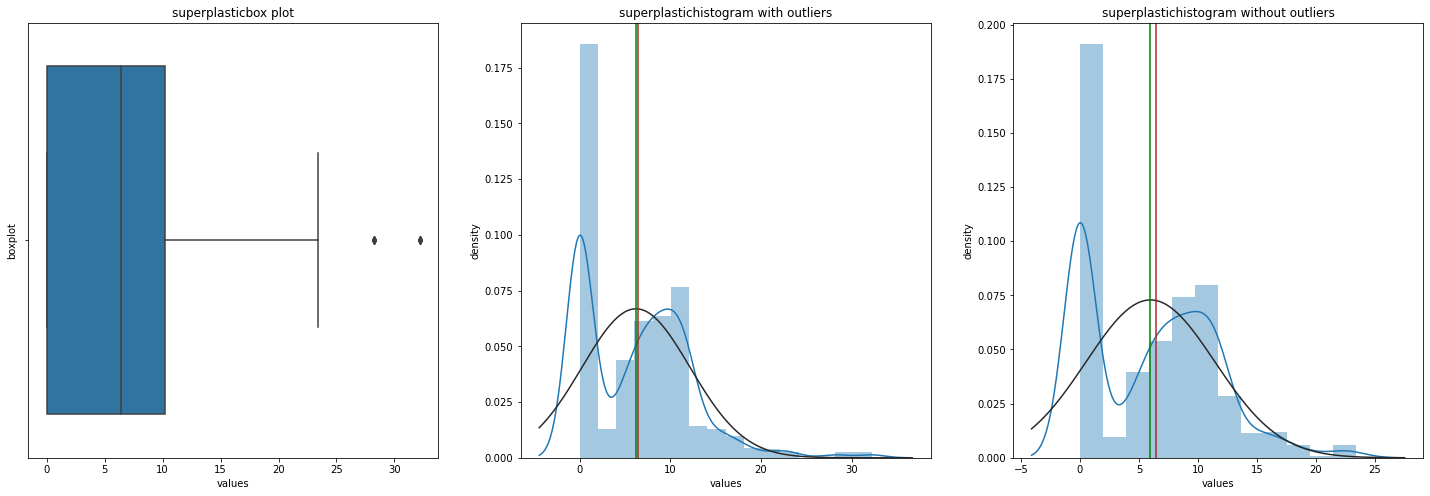

feature coarseagg does not have a outliers




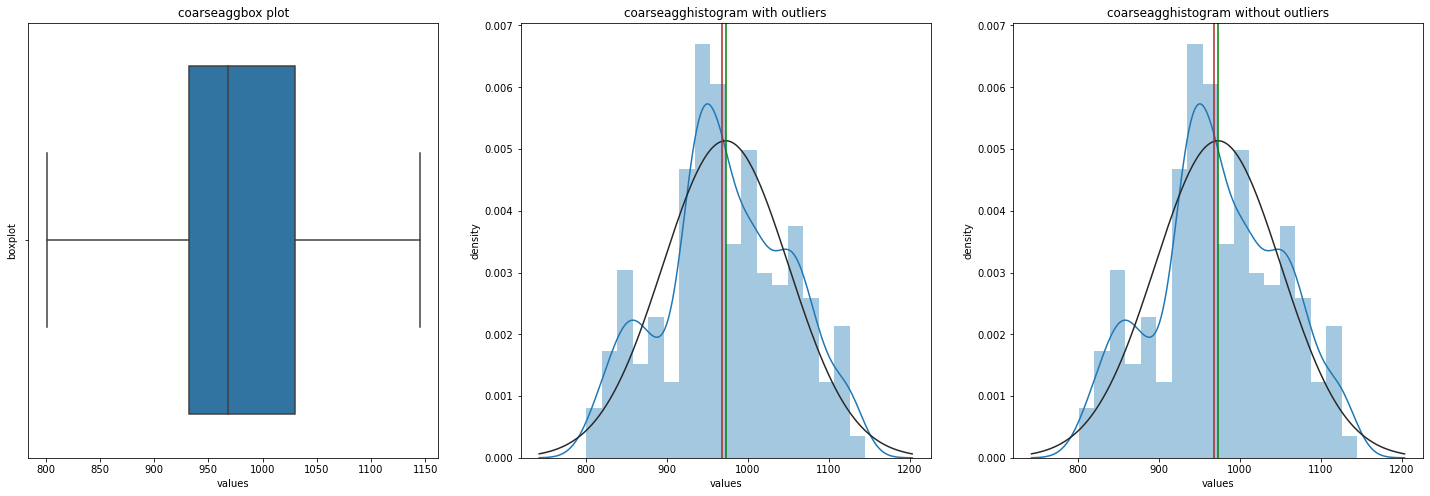

feature fineagg have a outliers
total no. of outliers fineagg are 5


outliers percentage in fineagg is 0.0%




cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129   375.0  93.8  0.0  126.6          23.4      852.1    992.6   91      62.5
447   375.0  93.8  0.0  126.6          23.4      852.1    992.6    7      45.7
504   375.0  93.8  0.0  126.6          23.4      852.1    992.6    3      29.0
584   375.0  93.8  0.0  126.6          23.4      852.1    992.6   56      60.2
857   375.0  93.8  0.0  126.6          23.4      852.1    992.6   28      56.7

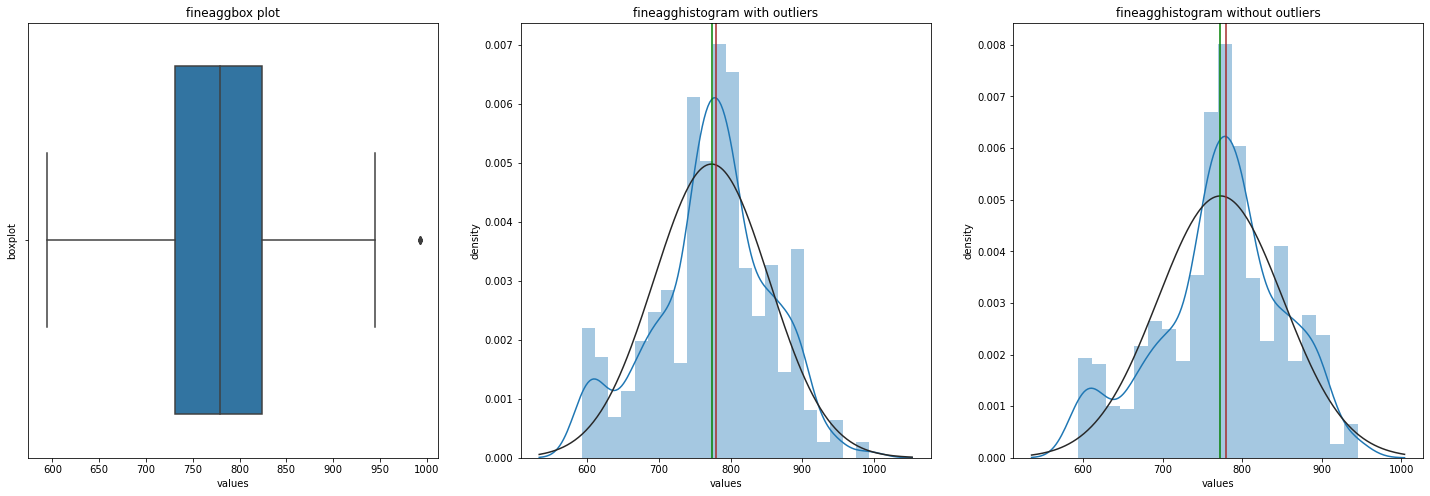

feature age have a outliers
total no. of outliers age are 59


outliers percentage in age is 6.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51     331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93     427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99     237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103    380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   
133    236.0    0.0  0.0  193.0           0.0      968.0    885.0  365   
144    302.0    0.0  0.0  203.0           0.0      974.0    817.0  180   
149    380.0   95.0  0.0  228.0           0.0      932.0    594.0  270   
152    322.0    0.0  0.0  203.0           0.0      974.0    800.0  180   
157    198.6  132.4  0.0  192.0           0.0      978.4    825.5  360   
159    304.0   76.0  0.0  228.0           0.0      932.0    670.0  365   
198    266.0  114.0  0.0  228.0           0.0      932.0    670.0  365   
199    277.0    0.0  0.0  191.0           0.0      968.0    856.0  180   
207    190.0  190.0  0.0  228.0           0.0      932.0    670.0  180   
256    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  270   
262    266.0  114.0  0.0  228.0           0.0      932.0    670.0  270   
270    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  270   
297    475.0    0.0  0.0  228.0           0.0      932.0    594.0  270   
302    342.0   38.0  0.0  228.0           0.0      932.0    670.0  180   
312    236.0    0.0  0.0  193.0           0.0      968.0    885.0  180   
313    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  270   
323    139.6  209.4  0.0  192.0           0.0     1047.0    806.9  360   
359    475.0    0.0  0.0  228.0           0.0      932.0    594.0  180   
361    277.0    0.0  0.0  191.0           0.0      968.0    856.0  360   
370    266.0  114.0  0.0  228.0           0.0      932.0    670.0  180   
393    342.0   38.0  0.0  228.0           0.0      932.0    670.0  365   
448    331.0    0.0  0.0  192.0           0.0      978.0    825.0  360   
465    427.5   47.5  0.0  228.0           0.0      932.0    594.0  365   
484    237.5  237.5  0.0  228.0           0.0      932.0    594.0  365   
539    304.0   76.0  0.0  228.0           0.0      932.0    670.0  180   
570    190.0  190.0  0.0  228.0           0.0      932.0    670.0  270   
581    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  180   
594    339.0    0.0  0.0  197.0           0.0      968.0    781.0  180   
601    339.0    0.0  0.0  197.0           0.0      968.0    781.0  365   
620    332.5  142.5  0.0  228.0           0.0      932.0    594.0  180   
622    380.0   95.0  0.0  228.0           0.0      932.0    594.0  180   
623    380.0    0.0  0.0  228.0           0.0      932.0    670.0  270   
632    304.0   76.0  0.0  228.0           0.0      932.0    670.0  270   
642    198.6  132.4  0.0  192.0           0.0      978.4    825.5  180   
696    307.0    0.0  0.0  193.0           0.0      968.0    812.0  180   
713    190.0  190.0  0.0  228.0           0.0      932.0    670.0  365   
720    380.0   95.0  0.0  228.0           0.0      932.0    594.0  365   
721    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  180   
754    254.0    0.0  0.0  198.0           0.0      968.0    863.0  365   
755    349.0    0.0  0.0  192.0           0.0     1047.0    806.0  360   
776    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  180   
850    427.5   47.5  0.0  228.0           0.0      932.0    594.0  270   
861    310.0    0.0  0.0  192.0           0.0      970.0    850.0  180   
878    237.5  237.5  0.0  228.0           0.0      932.0    594.0  270   
900    254.0    0.0  0.0  198.0           0.0      968.0    863.0  180   
901    475.0    0.0  0.0  228.0           0.0      932.0    594.0  365   
919    310.0    0.0  0.0  192.0           0.0      970.0    850.0  360   
951    332.5  142.5  0.0  228.0           0.0      932.0    594.0  270   
957    307

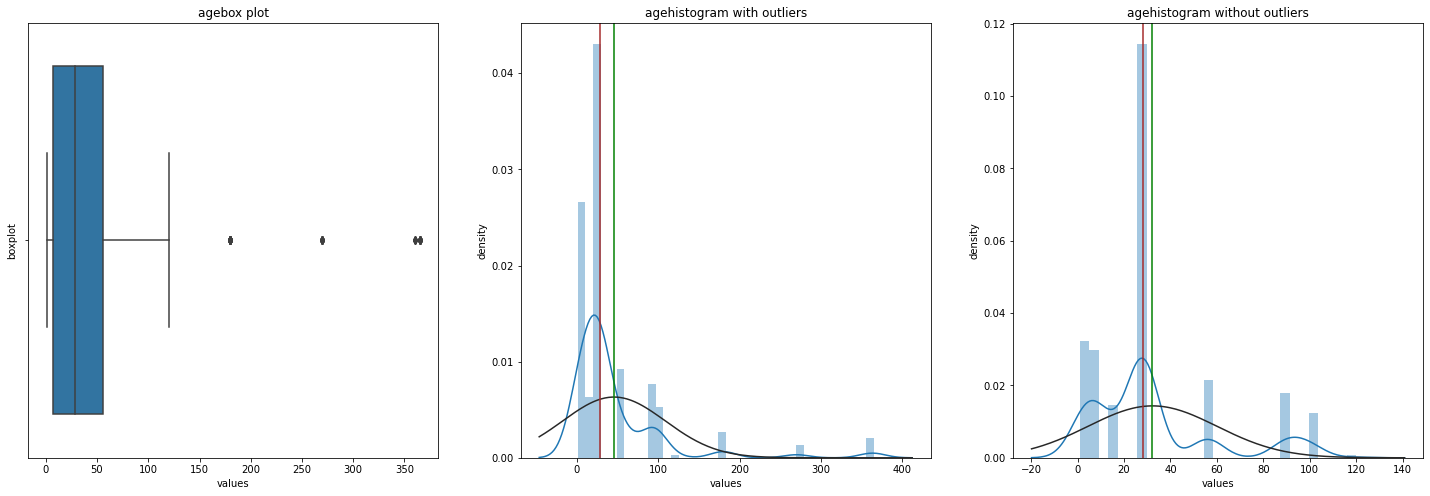

feature strength have a outliers
total no. of outliers strength are 4


outliers percentage in strength is 0.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
192    315.0  137.0  0.0  145.0           5.9     1130.0    745.0   28   
732    540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28   
950    389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   
1003   323.7  282.8  0.0  183.8          10.3      942.7    659.9   56   

      strength  
192      81.75  
732      79.99  
950      82.60  
1003     80.20

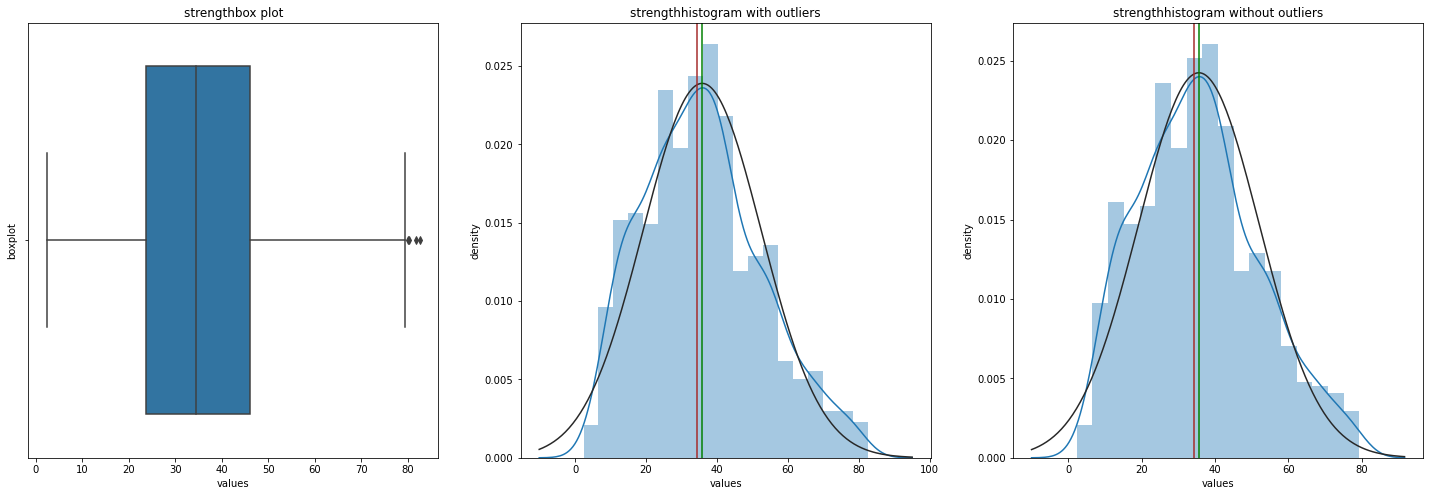

In [11]:
for col in df.columns:
    odt_plots(df,col)
    

### multivariate analysis using regression

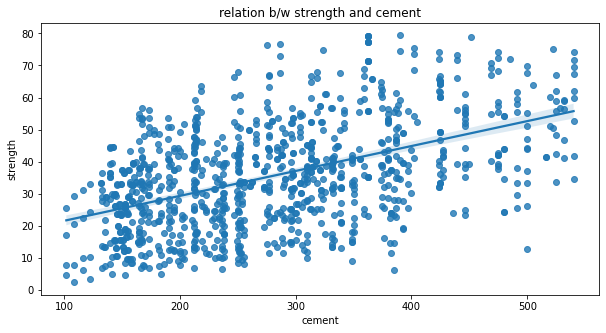

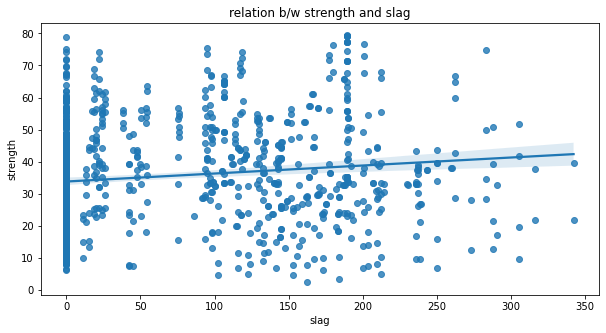

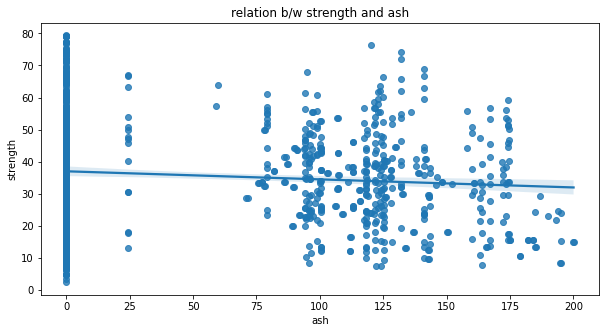

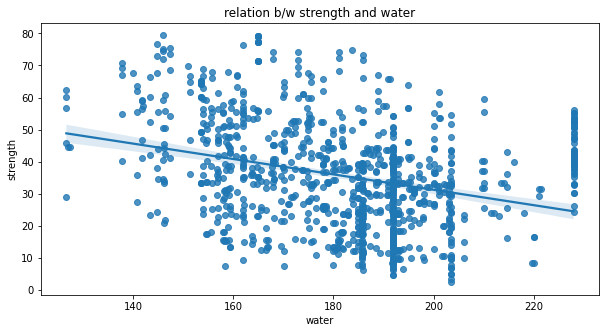

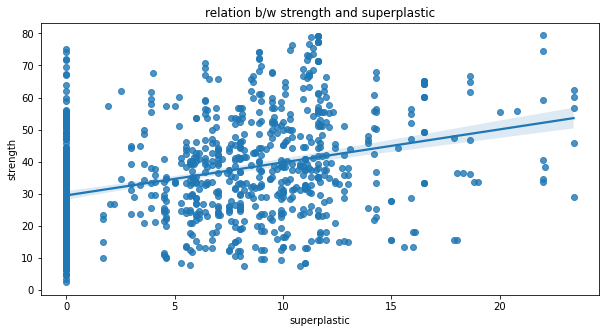

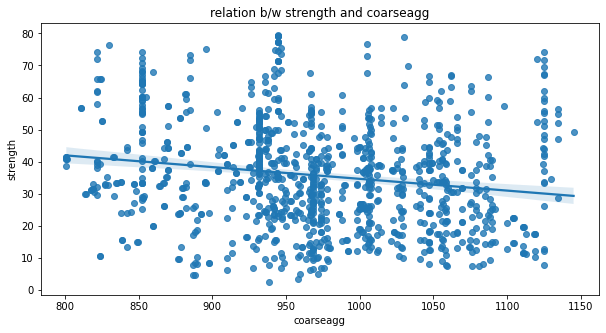

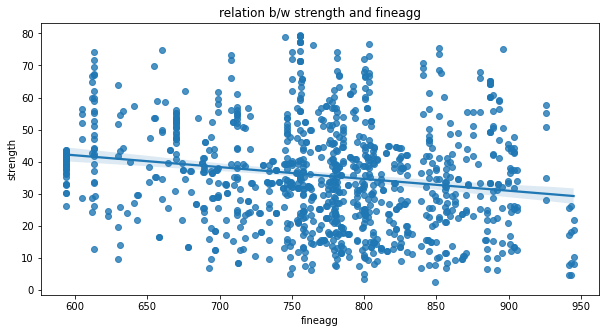

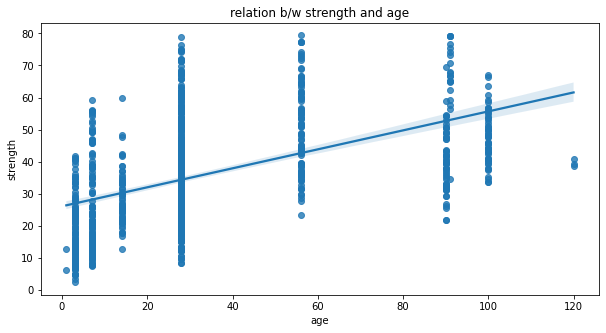

In [12]:
for col in df.columns:
    if col != 'strength':
        fig,ax1 = plt.subplots(figsize = (10 , 5))
        sns.regplot(x = df[col],y = df['strength'], ax = ax1).set_title(f'relation b/w strength and {col}')

###analysis from regression data
1. strength and cement are highlt correlated
2. strength and slag are slightly positively correlated
3. strength and ash are slightly negatively correlated
##4. complete the rest

### correlation matrix/heatmap(stage 1)

<AxesSubplot:>

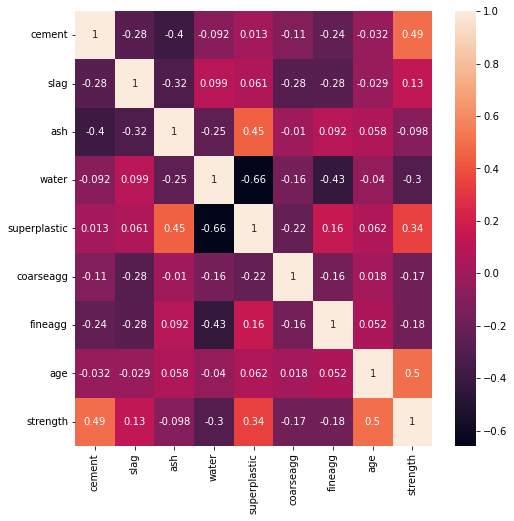

In [13]:
corr = df.corr()
df.ax = plt.subplots(figsize = (8, 8))
sns.heatmap(corr ,annot  = True)

### analysis/result for stage 1 test
1. slag has high corr with ash
2. ash  has high corr with strength and superplastic
3. home work for relating the correlation with each other
4. many features have 30% more then corr then we can find ther is multicolinerity b/w each other.

### multicollinerity test

- variance inflation factor
- formula for VIF is 1/(1-r2)
- steps for calculating
- regress every independent features with each other and find r2.
- find VIF using above formula
- if VIF > 5 then we can say there is multicollinerity between each other
- multicollinerity has to be below 20%.
- 

### VIF calculations

### corr with target features

In [14]:
def correlation_target(data,t_col):
    independent_variable = data.drop(t_col,axis  = 1).columns
    
    corr_result = []
    for col in independent_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independent_variable,corr_result],index = ['Independent Variable','correlations' ]).T
    return result.sort_values('correlations',ascending = False)

In [15]:
correlation_target(df,'strength')

Independent Variable correlations
7                  age     0.499711
0               cement     0.493518
4         superplastic     0.342633
1                 slag     0.129561
2                  ash    -0.097973
5            coarseagg    -0.173234
6              fineagg    -0.176113
3                water    -0.300043

## analysis result
- age and cement has 50% corr with strength
- sp and water has 34 and 30% corr with stregth


In [16]:
def VIF(features):
    vif  = pd.DataFrame(columns = ['Features','VIF'])
    vif.iloc[:,1] = [variance_inflation_factor(features,i) for i in range (features.shape[1])]
    vif.iloc[:,0] = features.columns
    return vif

In [17]:
VIF(df)

Features        VIF
0        cement  27.482281
1          slag   4.318680
2           ash   4.643046
3         water  86.437668
4  superplastic   5.809932
5     coarseagg  87.171583
6       fineagg  68.669720
7           age   4.420203
8      strength  19.074370

In [18]:
### analysis from stage 2 result
# 6 feature have vif more than 5 SO we can conclude there are multicolinerity exist in our data

### PCA to treat multicolinerity

In [19]:
def custom_PCA(X):
    n_comp = len(X.columns)
    
    #applying standard feature
    sd = StandardScaler()
    X = sd.fit_transform(X)
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9:
            pca = i
            break
            
    print('explained variance after PCA is: ',evr)
    
    #creating dataframe of principal components
    col = []
    for j in range(1,pca+1):
        col.append('pc_' + str(j))
        
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df    
                                
        

In [20]:
pca_df = custom_PCA(df.drop('strength',axis  = 1))

explained variance after PCA is:  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


### joining PCA feature with target feature

In [21]:
pca_df = pca_df.join(df['strength'], how  = 'left')

In [22]:
pca_df.head()

pc_1      pc_2      pc_3      pc_4      pc_5      pc_6  strength
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29

In [23]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

###  model building
1. stages of model building
2. custom train test split function to perform cross validation.to do hyper-parameter tunning
3. evr help  us to decide how much pca we needed for the collecting the information.




In [24]:
def train_and_test_split(data,t_col,testsize = 0.3,randomstate = 3):
    X = data.drop(t_col,axis = 1)
    y = data[t_col]
    return train_test_split(X,y,test_size = testsize,random_state = randomstate)

In [25]:
def model_builder(model_name,model,data,t_col):
    X_train,X_test,y_train,y_test = train_and_test_split(data,t_col)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    result = [model_name,rmse,r2]
    return result


In [26]:
model_builder(model_name = 'LinearRegression', model = LinearRegression(),data  = pca_df,t_col = 'strength')

['LinearRegression', 9.09802941314396, 0.7005612990763812]

In [27]:
def multiple_models(data,t_col):
    col_names = [ 'Model Name','RMSE','R2']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder( 'LinearRegression', LinearRegression(),data,t_col)
    result.loc[len(result)] = model_builder( 'LassoRegression', Lasso(),data,t_col)
    result.loc[len(result)] = model_builder( 'RidgeRegression', Ridge(),data,t_col)
    result.loc[len(result)] = model_builder( 'DTR', DecisionTreeRegressor(),data,t_col)
    result.loc[len(result)] = model_builder( 'SVR', SVR(),data,t_col)
    result.loc[len(result)] = model_builder( 'RandomForestRegressor', RandomForestRegressor(),data,t_col)
    result.loc[len(result)] = model_builder( 'KNN',  KNeighborsRegressor(),data,t_col)
    result.loc[len(result)] = model_builder( 'GBoost',GradientBoostingRegressor(),data,t_col)
    result.loc[len(result)] = model_builder( 'XGBoost',XGBRegressor(),data,t_col)
    result.loc[len(result)] = model_builder( 'AdBoost',AdaBoostRegressor(),data,t_col)
    return result.sort_values('R2' ,ascending = False)
    
                         

In [28]:
multiple_models(pca_df,'strength')

Model Name      RMSE        R2
8                XGBoost  5.952696  0.871814
5  RandomForestRegressor  6.377941  0.852845
7                 GBoost  6.660965  0.839495
6                    KNN  7.796799  0.780090
9                AdBoost  8.724510  0.724644
3                    DTR  8.927295  0.711694
0       LinearRegression  9.098029  0.700561
2        RidgeRegression  9.099976  0.700433
4                    SVR  9.123982  0.698851
1        LassoRegression  9.494112  0.673922

In [29]:
def K_ford_CV(X,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),X,y,cv = fold)
    score_ls = cross_val_score(Lasso(),X,y,cv = fold)
    score_rd = cross_val_score(Ridge(),X,y,cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(),X,y,cv = fold)
    score_svr = cross_val_score(SVR(),X,y,cv = fold)
    score_rf= cross_val_score(RandomForestRegressor(),X,y,cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),X,y,cv = fold)
    score_xg = cross_val_score(XGBRegressor(),X,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),X,y,cv = fold)
    
    
    model_name = ['LinearRegression','Lasso','ridge','DecisionTreeregressor','SVR','RandomForestregresso',
                  'KNeighborsregressor','GBoosti','XGBoost','AdaBoost']
    scores = [score_lr,score_ls,score_rd,score_dtr,score_svr,score_rf,score_knn,score_gb,score_xg,score_ada]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_ford_df = pd.DataFrame(result,columns = ['model name','CV accuracy','CV std'])
    return k_ford_df.sort_values('CV accuracy',ascending = False)
    
    
    

In [30]:
K_ford_CV(pca_df.drop('strength',axis = 1),pca_df['strength'])

model name  CV accuracy    CV std
8                XGBoost     0.873262  0.036061
5   RandomForestregresso     0.864451  0.033688
7                GBoosti     0.828646  0.050341
6    KNeighborsregressor     0.768198  0.055962
3  DecisionTreeregressor     0.757944  0.058299
9               AdaBoost     0.723718  0.045555
4                    SVR     0.703117  0.042765
2                  ridge     0.663935  0.059437
0       LinearRegression     0.663928  0.059476
1                  Lasso     0.649837  0.049887

In [31]:
## hyperparameter tunning


In [35]:
def tunning(X,y,fold = 10):
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_knn = {'n_neighbors' : [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_dtr = {'max_depth' : [3,5,7,9,10,12,14,16],'max_features' : ['auto','log2','sqrt',2,3,4,5,6]}
    param_svr = {'gamma' : ['scale','auto'],'C' : [0.5,1.0]}
    param_adb = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_gboost = {'alpha':  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xgb = {'eta' : [0.1,0.2,0.3,0.4,0.5],'max_depth' : [3,5,7,9,10,12,14,16],'gamma' : [10,20,30,40,50,60,70
                ,80,90,100,200,300,400,500],'reg_lambda':[0.1]}
    param_rf = {'max_depth' : [3,5,7,9,10,12,14,16],'max_features': ['auto','log2','sqrt',2,3,4,5,6]}
    
    #hyper parameter tunning
    tune_las = GridSearchCV(Lasso(),param_las,cv = fold)
    tune_rid = GridSearchCV(Ridge(),param_las,cv = fold)
    tune_knn = GridSearchCV(KNeighborsRegressor(),param_knn,cv = fold)
    tune_dtr = GridSearchCV(DecisionTreeRegressor(),param_dtr,cv = fold)
    tune_svr = GridSearchCV(SVR(),param_svr,cv = fold)
    tune_adb = GridSearchCV(AdaBoostRegressor(),param_adb,cv = fold)
    tune_gboost = GridSearchCV(GradientBoostingRegressor(),param_gboost,cv = fold)
    tune_xgb = GridSearchCV(XGBRegressor(),param_xgb,cv = fold)
    tune_rf = GridSearchCV(RandomForestRegressor(),param_rf,cv = fold)
    
    
    #fitting X,Y
    
    tune_las.fit(X,y)
    tune_rid.fit(X,y)
    tune_knn.fit(X,y)
    tune_dtr.fit(X,y)
    tune_svr.fit(X,y)
    tune_adb.fit(X,y)
    tune_gboost.fit(X,y)
    tune_xgb.fit(X,y)
    tune_rf.fit(X,y)
    
    
    tune = [tune_las,tune_rid,tune_knn,tune_dtr,tune_svr,tune_adb,tune_gboost,tune_xgb,tune_rf]
    models = ['Lasso','ridge','KNeighborsregressor','DecisionTreeregressor','SVR','AdaBoost',
                  'GBoost','XGBoost','RandomForestRegressor']
    
    for i in range(len(tune)):
        print('Models: ' ,models[i])
        print('Best parameters: ',tune[i].best_params_)
    
    


In [105]:
tunning(pca_df.drop('strength',axis = 1),pca_df['strength'])

Models:  Lasso
Best parameters:  {'alpha': 0.1}
Models:  ridge
Best parameters:  {'alpha': 6}
Models:  KNeighborsregressor
Best parameters:  {'n_neighbors': 4}
Models:  DecisionTreeregressor
Best parameters:  {'max_depth': 12, 'max_features': 4}
Models:  SVR
Best parameters:  {'C': 1.0, 'gamma': 'scale'}
Models:  AdaBoost
Best parameters:  {'learning_rate': 0.8}
Models:  GBoost
Best parameters:  {'alpha': 0.2}
Models:  XGBoost
Best parameters:  {'eta': 0.2, 'gamma': 10, 'max_depth': 5, 'reg_lambda': 0.1}
Models:  RandomForestRegressor
Best parameters:  {'max_depth': 16, 'max_features': 5}


## cross validation post hyperparameter tunning

In [36]:
def cv_post_hpt(X,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),X,y,cv = fold)
    score_ls = cross_val_score(Lasso(alpha = 0.1),X,y,cv = fold)
    score_rd = cross_val_score(Ridge(alpha = 0.1),X,y,cv = fold)
    score_dtr = cross_val_score(DecisionTreeRegressor(max_depth = 12),X,y,cv = fold)
    score_svr = cross_val_score(SVR(C = 1),X,y,cv = fold)
    score_rf= cross_val_score(RandomForestRegressor(),X,y,cv = fold)
    score_knn = cross_val_score(KNeighborsRegressor(),X,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(alpha = 0.9),X,y,cv = fold)
    score_xg = cross_val_score(XGBRegressor(eta = 0.2),X,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(learning_rate = 0.6),X,y,cv = fold)
    
    
    model_name = ['LinearRegression','Lasso','ridge','DecisionTreeregressor','SVR','RandomForestregresso',
                  'KNeighborsregressor','GBoosti','XGBoost','AdaBoost']
    scores = [score_lr,score_ls,score_rd,score_dtr,score_svr,score_rf,score_knn,score_gb,score_xg,score_ada]
    result = []
    for i in range(len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name,score_mean,score_std]
        result.append(temp)
    k_ford_df = pd.DataFrame(result,columns = ['model name','CV accuracy','CV std'])
    return k_ford_df.sort_values('CV accuracy',ascending = False)
    
        

In [38]:
cv_post_hpt(pca_df.drop('strength',axis = 1),pca_df['strength'])

model name  CV accuracy    CV std
8                XGBoost     0.872393  0.035963
5   RandomForestregresso     0.869443  0.031445
7                GBoosti     0.828987  0.050649
6    KNeighborsregressor     0.768198  0.055962
3  DecisionTreeregressor     0.762276  0.062750
9               AdaBoost     0.728370  0.039857
4                    SVR     0.703117  0.042765
1                  Lasso     0.664143  0.058426
2                  ridge     0.663928  0.059472
0       LinearRegression     0.663928  0.059476

In [41]:
K_ford_CV(pca_df.drop('strength',axis = 1),pca_df['strength'])

model name  CV accuracy    CV std
8                XGBoost     0.873262  0.036061
5   RandomForestregresso     0.863637  0.034395
7                GBoosti     0.829257  0.050522
3  DecisionTreeregressor     0.772438  0.067607
6    KNeighborsregressor     0.768198  0.055962
9               AdaBoost     0.729790  0.034316
4                    SVR     0.703117  0.042765
2                  ridge     0.663935  0.059437
0       LinearRegression     0.663928  0.059476
1                  Lasso     0.649837  0.049887

### clustring
- using k means clustring to check if accuracy can be improved further


<AxesSubplot:xlabel='cement', ylabel='strength'>

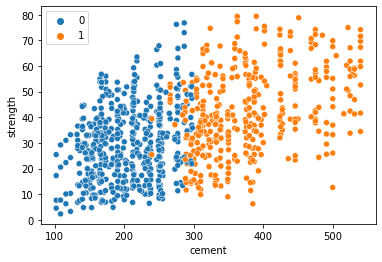

In [40]:
k_means = KMeans(n_clusters = 2,random_state = 5)
clusters = k_means.fit_predict(df.drop('strength',axis = 1))
sns.scatterplot(x = df['cement'], y = df['strength'] ,hue = clusters)

In [49]:
def clustering(X,t_col,clusters):
    column = list(set(list(X.columns)) - set(X['strength']))
    r = int(len(column)/2)
    if r % 2 == 0:
        r = r
    else:
        r += 1
        
        
    f,ax = plt.subplots(r,2,figsize = (15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(X[t_col],X[column[a]], c = clusters)
                ax[row][col].set_xlabel(t_col)
                ax[row][col].set_ylabel(column[a]) 
                a += 1

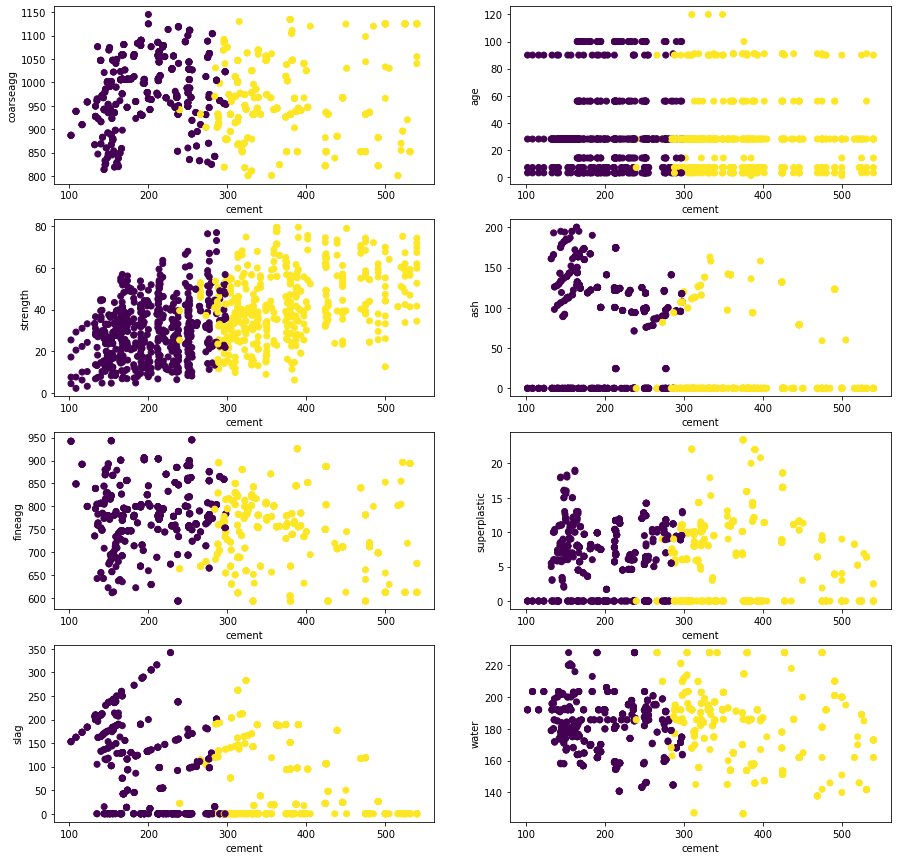

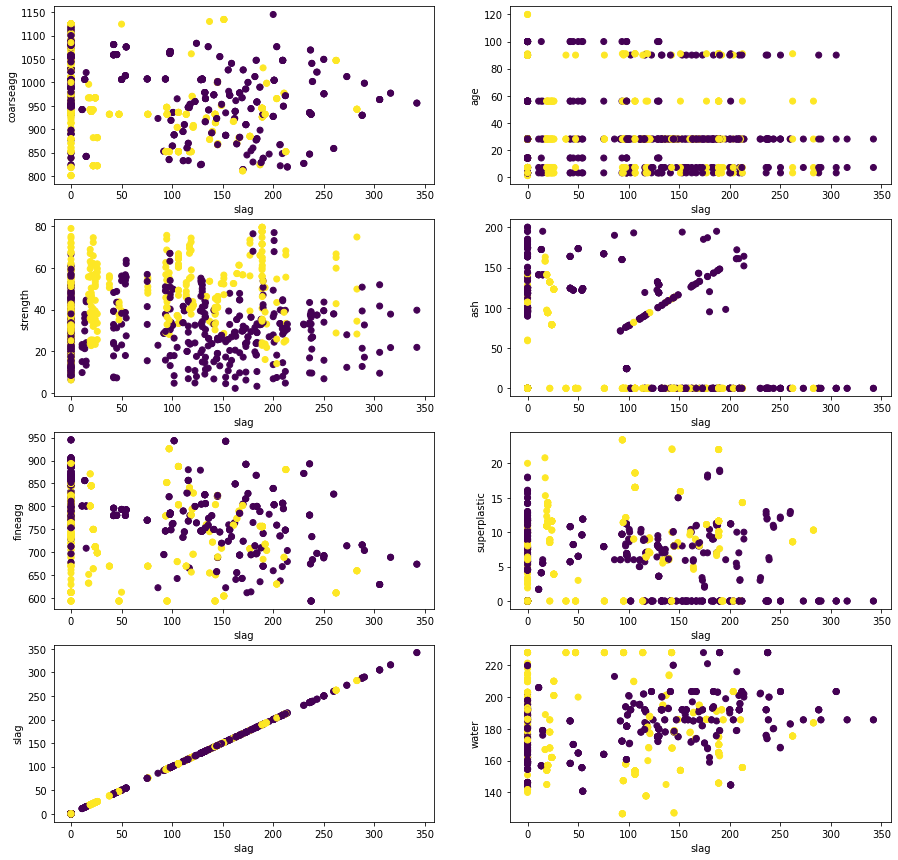

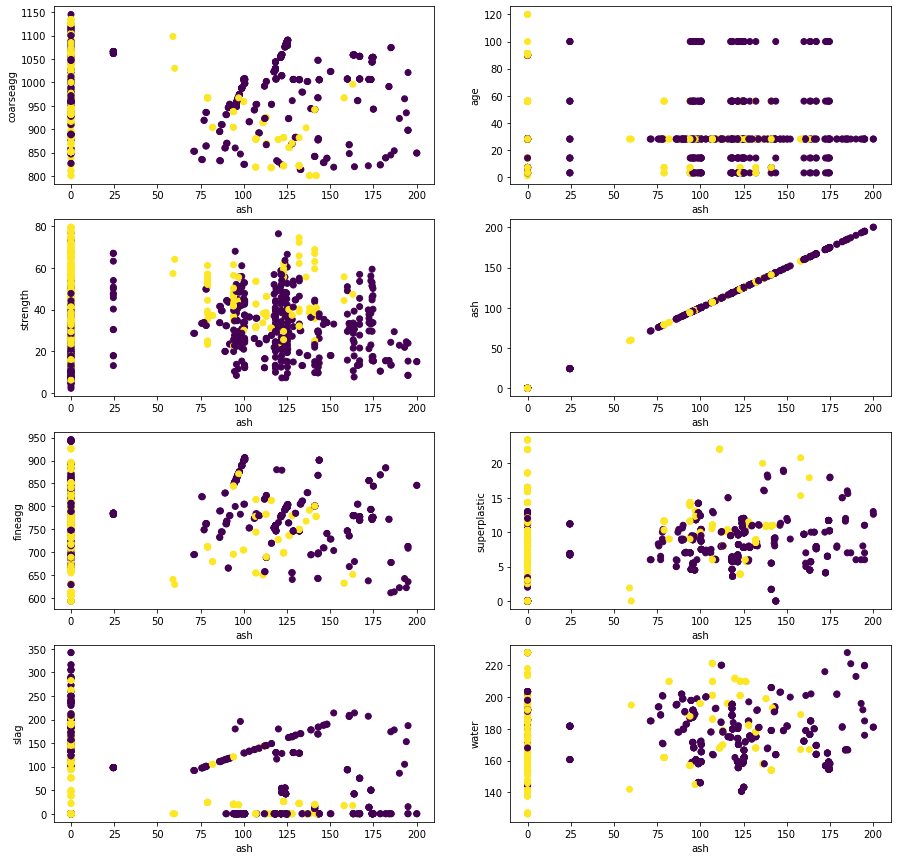

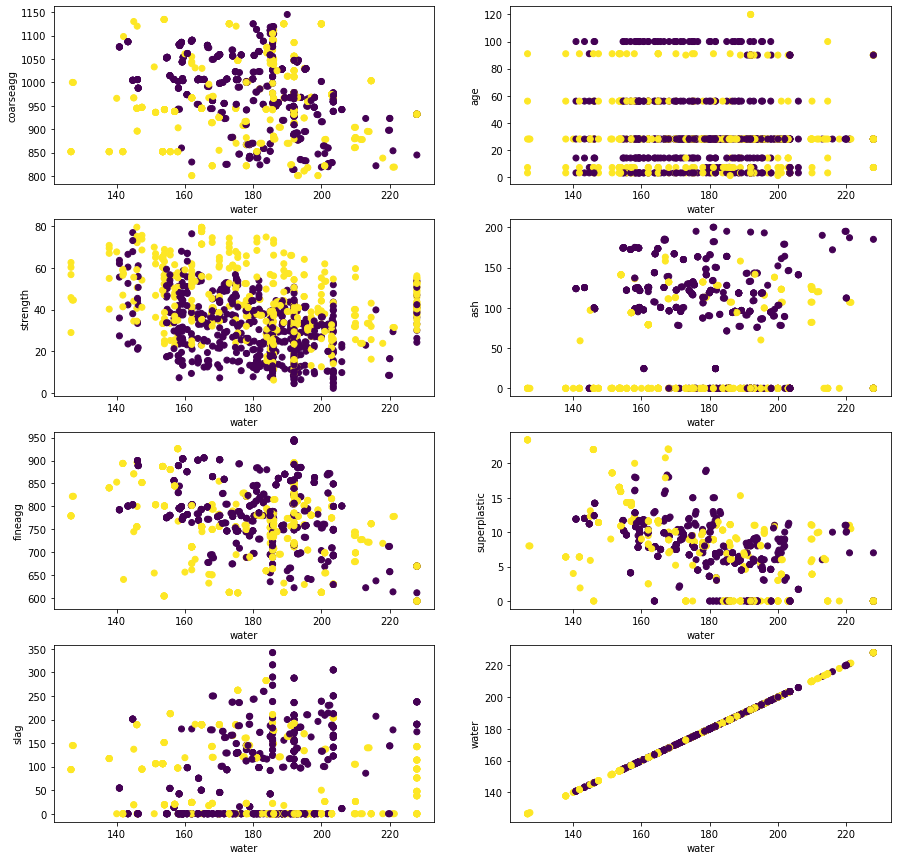

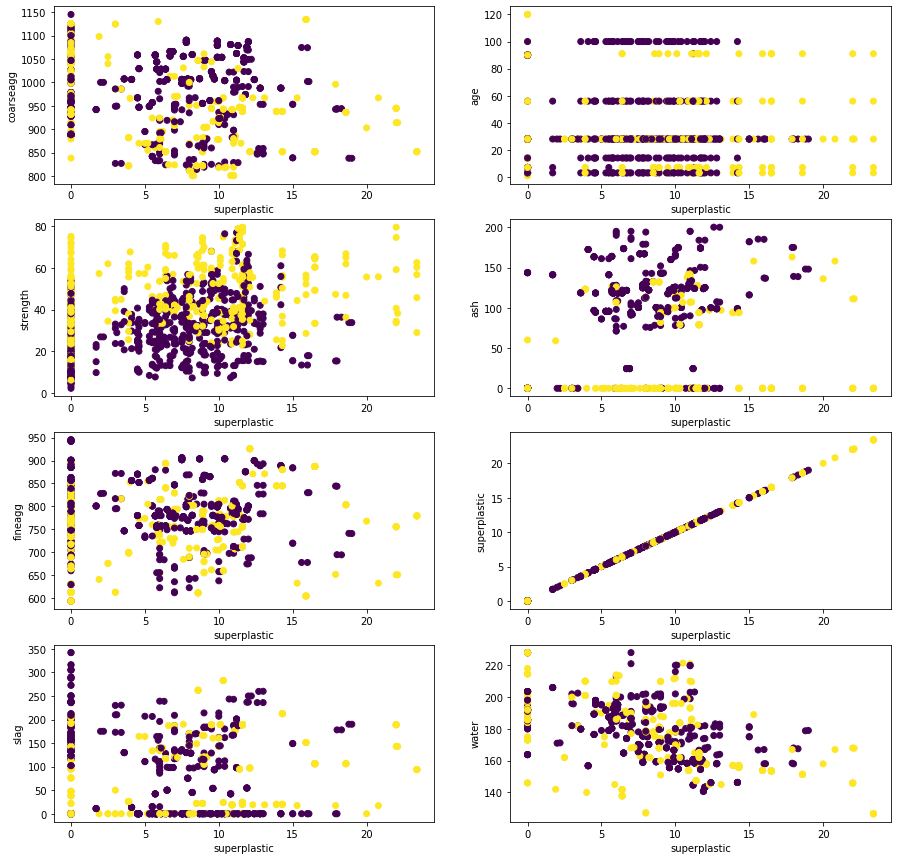

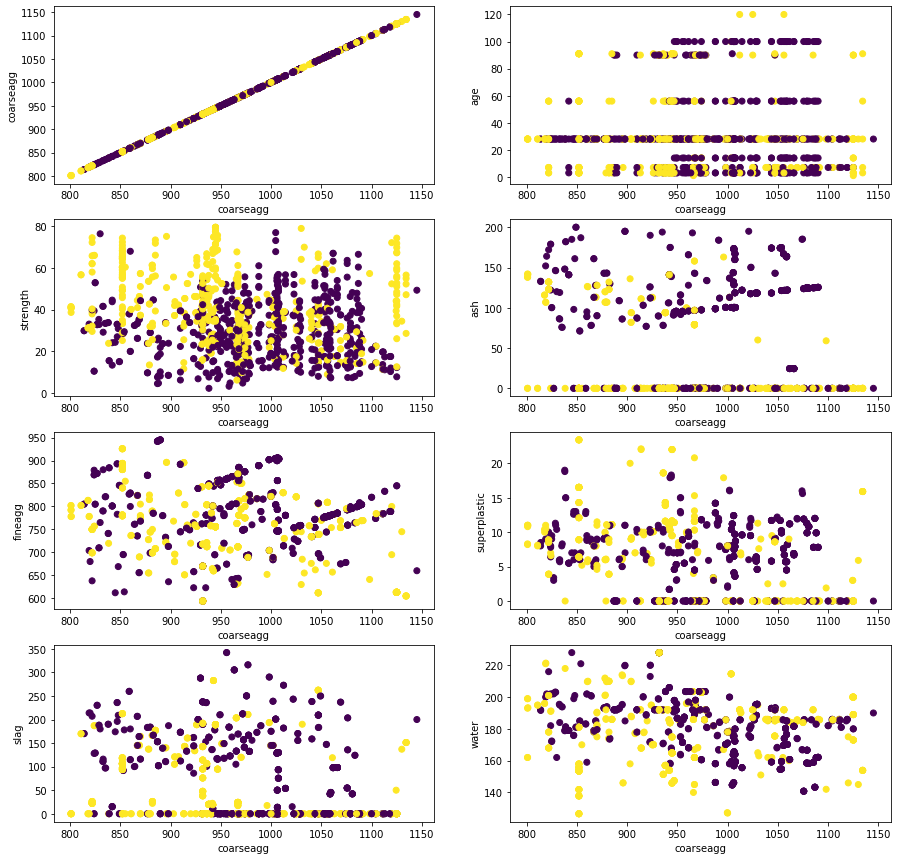

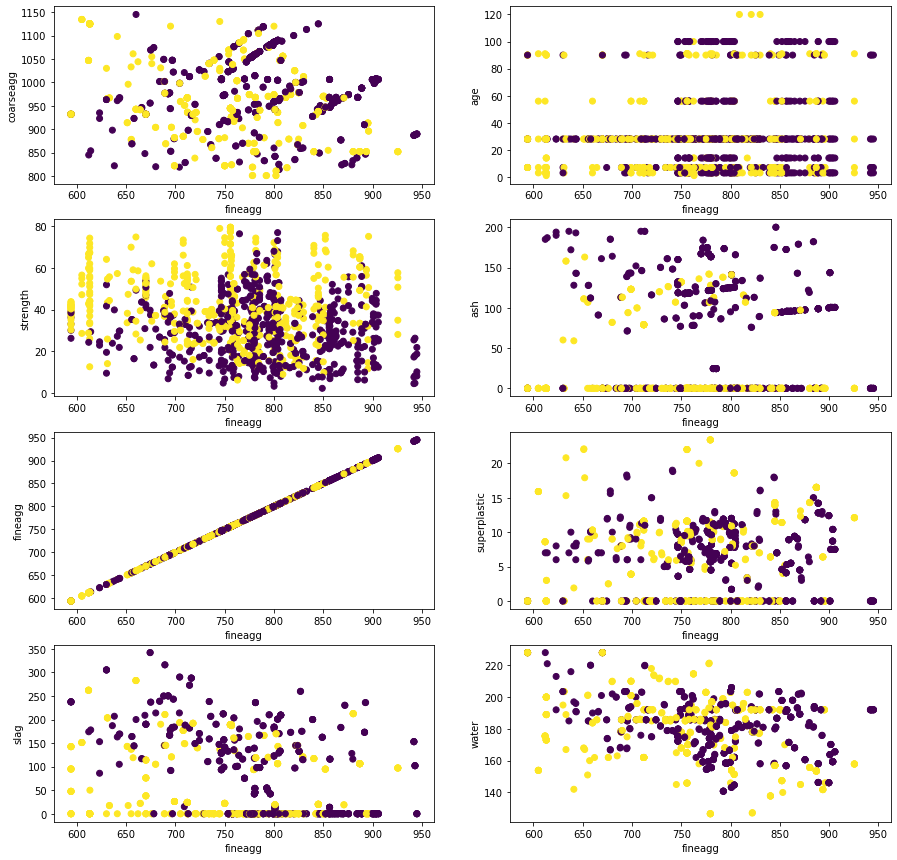

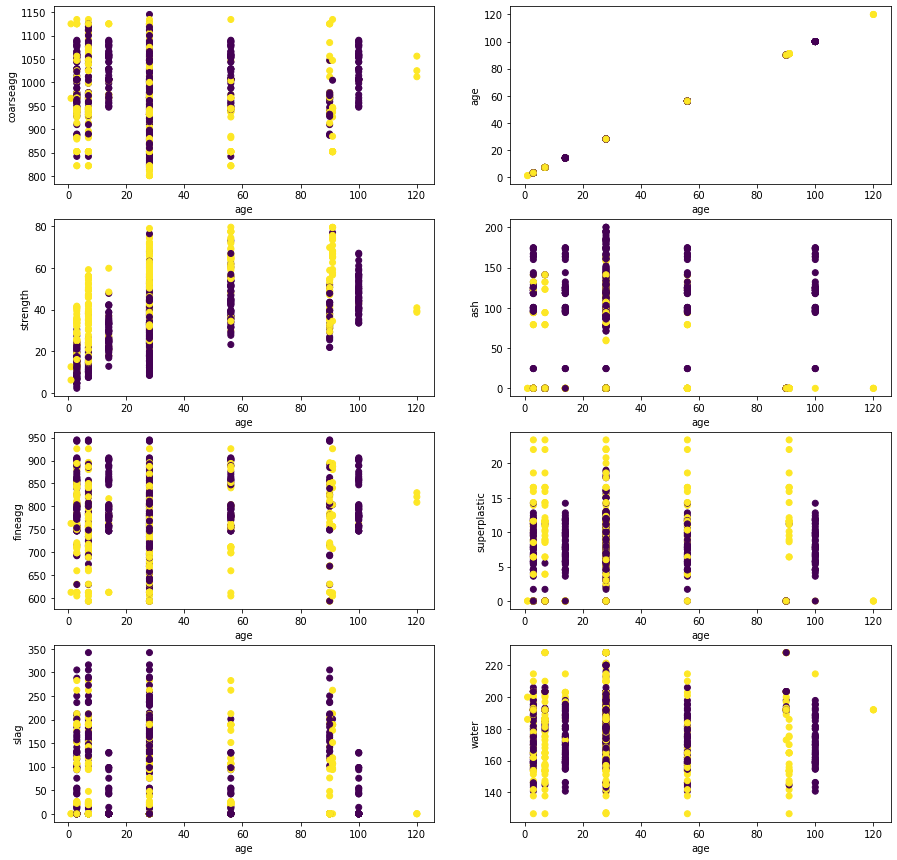

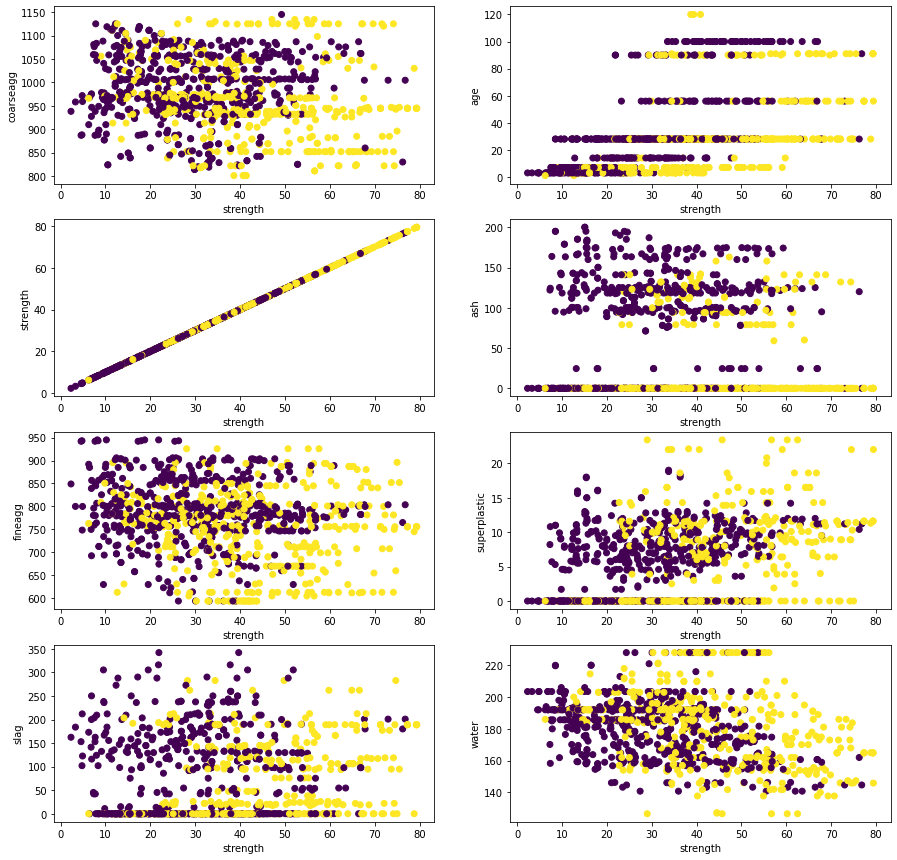

In [50]:
X = df.drop('strength',axis = 1)
for col in df.columns:
    clustering(df, col,clusters)

# ANALYSIS:
 - cement is forming a cluster with all independent features.

In [53]:
new_df = df.join(pd.DataFrame(clusters,columns = ['clusters']),how = 'left')

In [54]:
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  clusters  
0     29.89         0  
1     23.51         0  
2     29.22         0  
3     45.85         1  
4     18.29         0

In [58]:
new_df['clusters'].value_counts()

0    567
1    463
Name: clusters, dtype: int64

In [63]:
cluster_agg = new_df.groupby('clusters')['cement'].agg(['mean','median'])

In [64]:
cluster_agg

mean  median
clusters                    
0         203.132804   202.0
1         376.731317   362.6

In [66]:
clusters_df = new_df.merge(cluster_agg,on = 'clusters',how = 'left')

In [68]:
clusters_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8           6.4      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0   28   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  clusters        mean  median  
0        29.89         0  203.132804   202.0  
1        23.51         0  203.132804   202.0  
2        29.22         0  203.132804   202.0  
3        45.85         1  376.731317   362.6  
4        18.29         0  203.132804   202.0  
...        ...       ...         ...     ...  
1025     13.29         0  203.132804   202.0  
1026     41.30         1  376.731317   362.6  
1027     44.28         0  203.132804   202.0  
1028     55.06         1  376.731317   362.6  
1029     52.61         1  376.731317   362.6  

[1030 rows x 12 columns]

In [70]:
multiple_models(clusters_df.drop('clusters',axis = 1),'strength')

Model Name       RMSE        R2
8                XGBoost   5.583787  0.887210
5  RandomForestRegressor   5.681788  0.883216
7                 GBoost   5.864100  0.875601
3                    DTR   6.624172  0.841264
9                AdBoost   8.141297  0.760227
2        RidgeRegression   8.783872  0.720884
0       LinearRegression   8.792884  0.720311
1        LassoRegression   8.798093  0.719979
6                    KNN   9.985832  0.639270
4                    SVR  14.324008  0.257763

In [77]:
X = clusters_df.drop(['strength','clusters'],axis = 1)
y = clusters_df['strength']
K_ford_CV(X,y)

model name  CV accuracy    CV std
8                XGBoost     0.899436  0.046856
5   RandomForestregresso     0.886216  0.034962
7                GBoosti     0.875953  0.045030
3  DecisionTreeregressor     0.829177  0.047906
9               AdaBoost     0.742662  0.038533
2                  ridge     0.686641  0.062314
0       LinearRegression     0.686438  0.062291
1                  Lasso     0.686437  0.062413
6    KNeighborsregressor     0.669227  0.087720
4                    SVR     0.246843  0.044778

In [ ]:
# UNDERSTANDING feature importance of xgboost

In [80]:
x_train,x_test,y_train,y_test = train_and_test_split(clusters_df.drop(['clusters'], axis = 1),'strength')


In [81]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

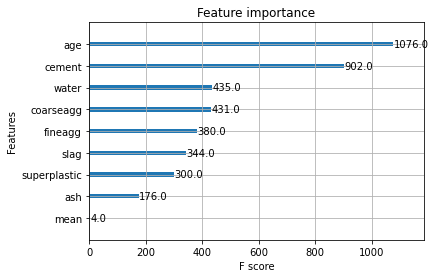

In [82]:
xgboost.plot_importance(xgb)

xgboost feature importance
- age and cement are two most importance feature of the mixture

In [84]:
imp_features = clusters_df[['age','cement','water','coarseagg','fineagg','strength']]

In [86]:
cv_post_hpt(imp_features.drop('strength',axis = 1),imp_features['strength'])

model name  CV accuracy    CV std
8                XGBoost     0.884666  0.044019
5   RandomForestregresso     0.864860  0.037079
7                GBoosti     0.842243  0.039788
3  DecisionTreeregressor     0.803592  0.075006
9               AdaBoost     0.699869  0.033974
1                  Lasso     0.657583  0.060431
2                  ridge     0.657579  0.060465
0       LinearRegression     0.657579  0.060465
6    KNeighborsregressor     0.645117  0.078104
4                    SVR     0.252828  0.044987

building learning curve analysis

In [94]:
def generate_lern_curv(model_name,estimator,X,y):
    train_size,train_score,test_score = learning_curve(estimator = estimator,X = X,y = y,cv = 10)
    train_score_mean = np.mean(train_score, axis = 1)
    test_score_mean = np.mean(test_score, axis = 1)
    plt.plot(train_size,train_score_mean,c = 'blue')
    plt.plot(train_size,test_score_mean,c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 score')
    plt.title('learning curve for' + model_name)
    plt.legend(('training r2 score','testing r2 score'))
    
    

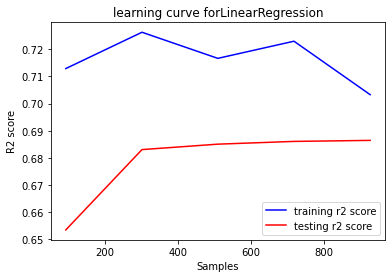

In [95]:
generate_lern_curv('LinearRegression',LinearRegression(),clusters_df.drop(['strength','clusters'],axis = 1),clusters_df['strength'])

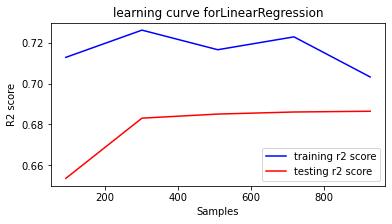

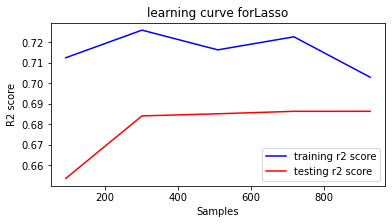

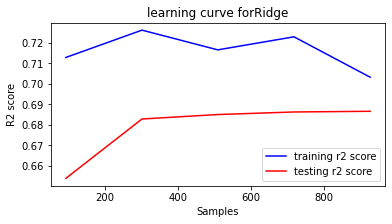

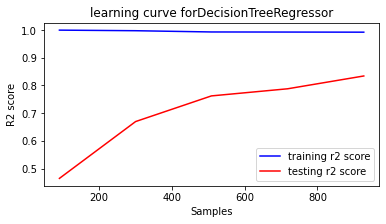

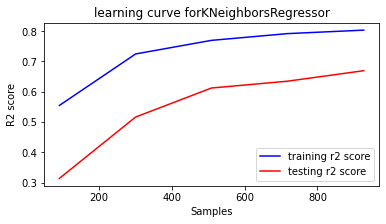

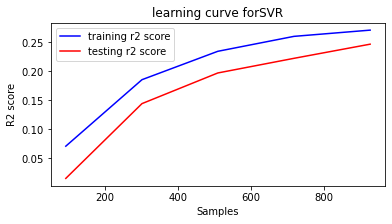

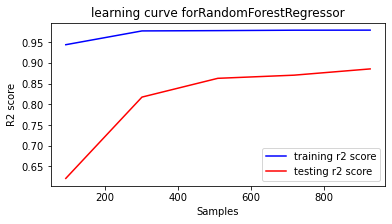

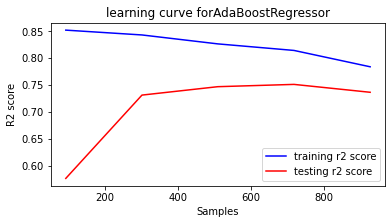

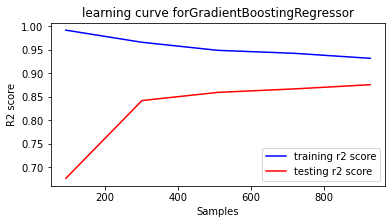

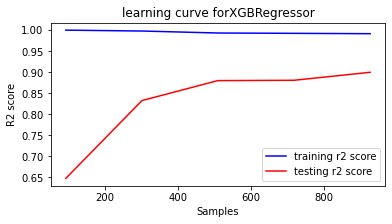

In [104]:
models = [LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(), KNeighborsRegressor(),SVR(),RandomForestRegressor(),
          AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
for a , model in enumerate(models):
    fg = plt.figure(figsize = (6,3))
    ax = fig.add_subplot(10,1,a+1)
    generate_lern_curv(type(models[a]).__name__,model,clusters_df.drop(['strength','clusters'],axis = 1),clusters_df['strength'])